In [2]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
# print(sys.path)
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns
os.environ["OPENBLAS_NUM_THREADS"] = "1"

['/mnt/data0/ildefog/Projects/NERM/model_analysis/Modes_protein_dynamics', '/home/jupyterhub/miniconda3/lib/python37.zip', '/home/jupyterhub/miniconda3/lib/python3.7', '/home/jupyterhub/miniconda3/lib/python3.7/lib-dynload', '', '/home/ildefog/.local/lib/python3.7/site-packages', '/home/ildefog/.local/lib/python3.7/site-packages/pydyno-0.1.1+94.g9b93be5-py3.7-linux-x86_64.egg', '/home/ildefog/.local/lib/python3.7/site-packages/sympy-1.5-py3.7.egg', '/home/ildefog/.local/lib/python3.7/site-packages/pysb-1.11.0-py3.7.egg', '/home/jupyterhub/miniconda3/lib/python3.7/site-packages', '/home/jupyterhub/miniconda3/lib/python3.7/site-packages/IPython/extensions', '/home/ildefog/.ipython', '../../', '/home/ildefog/main/Projects/NERM/', '../../', '/home/ildefog/main/Projects/NERM/']


In [116]:
mode1_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy')
mode2_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
mode3_100 = np.load('../../param_files/necro_pars10k_cluster3_5720_mod.npy')
mode4_100 = np.load('../../param_files/necro_pars10k_cluster4_5720_mod.npy')
pars = np.load('../../param_files/necro_pars10k_allclusmod.npy')

In [3]:
clus0_100e = np.load('../../param_files/necro_pars10k_cluster01_5720_modsplit.npy')
clus0_100m = np.load('../../param_files/necro_pars10k_cluster02_5720_modsplit.npy')
clus0_100d = np.load('../../param_files/necro_pars10k_cluster03_5720_modsplit.npy')

In [154]:
tspan = np.linspace(0, 1800, 500)

In [155]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1 = solverwtm1.run(param_values=mode1_100, num_processors = 20)
m1alldf100wt = wtm1.dataframe

2022-01-07 10:49:03.392 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-07 10:49:03.405 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-07 10:49:03.476 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-07 10:49:03.714 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-07 10:53:32.032 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-07 10:53:32.035 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-07 10:53:34.061 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [90]:
for i,t in enumerate(tspan):
    print(i,":",t)

0 : 0.0
1 : 2.8857715430861726
2 : 5.771543086172345
3 : 8.657314629258519
4 : 11.54308617234469
5 : 14.428857715430862
6 : 17.314629258517037
7 : 20.20040080160321
8 : 23.08617234468938
9 : 25.971943887775552
10 : 28.857715430861724
11 : 31.7434869739479
12 : 34.629258517034074
13 : 37.515030060120246
14 : 40.40080160320642
15 : 43.28657314629259
16 : 46.17234468937876
17 : 49.05811623246493
18 : 51.943887775551104
19 : 54.829659318637276
20 : 57.71543086172345
21 : 60.60120240480963
22 : 63.4869739478958
23 : 66.37274549098197
24 : 69.25851703406815
25 : 72.14428857715431
26 : 75.03006012024049
27 : 77.91583166332666
28 : 80.80160320641284
29 : 83.687374749499
30 : 86.57314629258518
31 : 89.45891783567134
32 : 92.34468937875752
33 : 95.2304609218437
34 : 98.11623246492987
35 : 101.00200400801604
36 : 103.88777555110221
37 : 106.77354709418839
38 : 109.65931863727455
39 : 112.54509018036073
40 : 115.4308617234469
41 : 118.31663326653307
42 : 121.20240480961925
43 : 124.08817635270542


In [109]:
sim_idx_pmlklm1 = [idx for idx in range(len(mode1_100)) if m1alldf100wt ['MLKLa_obs'][idx].iloc[382] > 2772]
print(len(sim_idx_pmlklm1))

3605


In [115]:
np.save('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy', mode1_100[sim_idx_pmlklm1])

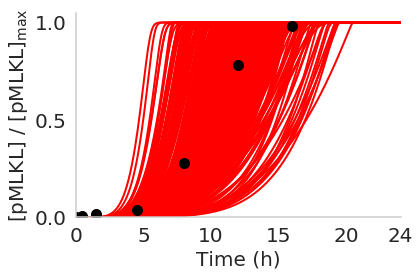

In [173]:
x = np.array([0, 30, 90, 270,480, 720, 960])
y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882, 0.2798939020159581, .7797294067, 0.98])
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100wt['MLKLa_obs'].iloc[:].max(),
             color = 'red', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('mode1_pmlkl_allpars_redcolor_nogridwdata.pdf')
plt.show() 

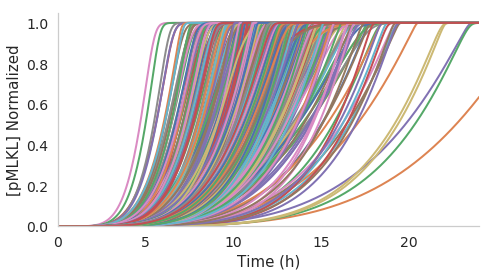

In [85]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100wt['MLKLa_obs'].iloc[:].max(),lw=2)
plt.xlabel("Time (h)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1_dynamics_pmlkl_test.pdf')
plt.show() 

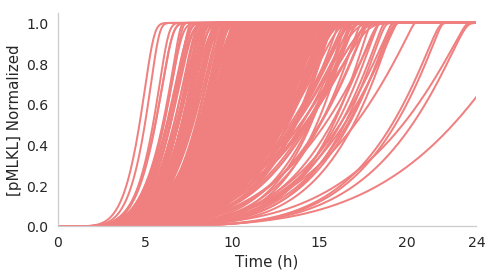

In [81]:
fig, ax = plt.subplots(figsize = (5, 4))
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100wt['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=15)
plt.ylabel("[pMLKL] Normalized", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('nerm_mode1_dynamics_pmlkl_test.pdf')
plt.show() 

In [13]:
solverwtm1e = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1e = solverwtm1e.run(param_values=clus0_100e[13], num_processors = 20)
m1edf100wt = wtm1e.dataframe

2021-12-07 16:22:14.734 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-07 16:22:14.747 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-07 16:22:14.818 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-07 16:22:14.878 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-07 16:22:15.130 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-07 16:22:15.132 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-07 16:22:15.183 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


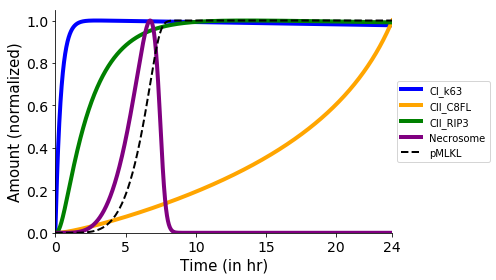

In [55]:
fig, ax = plt.subplots(figsize = (7, 4))
# plt.plot(tspan/60, m1edf100wt['CI_k63_obs'].iloc[:]/m1edf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
# plt.plot(tspan/60, m1edf100wt['CII_C8a_obs'].iloc[:]/m1edf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
# plt.plot(tspan/60, m1edf100wt['CII_RIP3_obs'].iloc[:]/m1edf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
# plt.plot(tspan/60, m1edf100wt['RIP1RIP3unmod_obs'].iloc[:]/m1edf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m1edf100wt['R1pR3p_obs'].iloc[:]/m1edf100wt['R1pR3p_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [30]:
solverm1m = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1m = solverm1m.run(param_values=clus0_100m[2], num_processors = 20)
m1mdf100wt = wtm1m.dataframe

2021-12-07 16:27:30.933 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-07 16:27:30.946 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-07 16:27:31.016 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-07 16:27:31.076 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-07 16:27:31.320 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-07 16:27:31.322 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-07 16:27:31.375 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


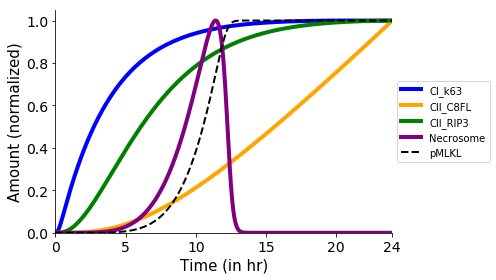

In [56]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m1mdf100wt['CI_k63_obs'].iloc[:]/m1mdf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m1mdf100wt['CII_C8a_obs'].iloc[:]/m1mdf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m1mdf100wt['CII_RIP3_obs'].iloc[:]/m1mdf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m1mdf100wt['RIP1RIP3unmod_obs'].iloc[:]/m1mdf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m1mdf100wt['MLKLa_obs'].iloc[:]/m1mdf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1m_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [43]:
solverm1d = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm1d = solverm1d.run(param_values=clus0_100d[10], num_processors = 20)
m1ddf100wt = wtm1d.dataframe

2021-12-07 16:35:33.705 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-07 16:35:33.718 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-07 16:35:33.791 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-07 16:35:33.850 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-07 16:35:34.124 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-07 16:35:34.126 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-07 16:35:34.186 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


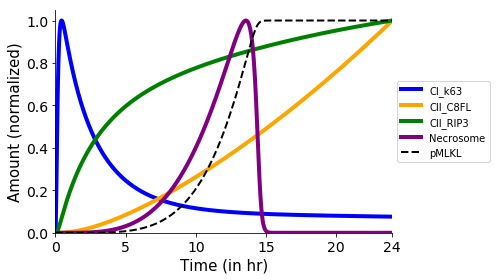

In [57]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m1ddf100wt['CI_k63_obs'].iloc[:]/m1ddf100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m1ddf100wt['CII_C8a_obs'].iloc[:]/m1ddf100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m1ddf100wt['CII_RIP3_obs'].iloc[:]/m1ddf100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m1ddf100wt['RIP1RIP3unmod_obs'].iloc[:]/m1ddf100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m1ddf100wt['MLKLa_obs'].iloc[:]/m1ddf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', color = 'black', linestyle = '--',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1d_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [62]:
m = model.components
tspan = np.linspace(0,1800,500)

In [156]:
solvera201 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus1 = solvera201.run(initials = {m.A20(brip = None):0},
                         param_values=mode1_100, num_processors = 20)
# a20clus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hra20ko.h5',include_obs_exprs = True)
c1df100a201 = a20clus1.dataframe

2022-01-07 10:53:37.044 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-07 10:53:37.049 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-07 10:53:37.085 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-07 10:53:37.278 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-07 10:57:45.223 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-07 10:57:45.224 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-07 10:57:47.252 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [157]:
solvercyld0 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclus0 = solvercyld0.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=mode1_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c0df100cyld = cyldclus0.dataframe

2022-01-07 10:57:50.411 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-07 10:57:50.417 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-07 10:57:50.450 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-07 10:57:50.644 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-07 11:02:02.376 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-07 11:02:02.378 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-07 11:02:04.460 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [158]:
solvercylda200 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclusa200 = solvercylda200.run(initials = {m.CYLD(brip=None, btraf = None):0,m.A20(brip = None):0},
                         param_values=mode1_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c0df100cylda20 = cyldclusa200.dataframe

2022-01-07 11:02:07.467 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-07 11:02:07.473 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-07 11:02:07.510 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-07 11:02:07.693 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-07 11:06:03.007 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-07 11:06:03.009 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-07 11:06:04.960 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [67]:
threshold = 2772

In [159]:
df_threshtimesc2100wt = m1alldf100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100a20   = c1df100a201.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cyld = c0df100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [160]:
df_threshtimesc2100cylda20 = c0df100cylda20.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [163]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'CYLDKO': df_threshtimesc2100cyld['MLKLa_obs'],
                          'A20KO': df_threshtimesc2100a20['MLKLa_obs'],
                       'CYLDKOA20KO': df_threshtimesc2100cylda20['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'CYLDKO','A20KO', 'CYLD;A20DKO'])
dfclus0n = pd.melt(dfclus0n)

In [169]:
dfclus0n.head()

,variable,value
0,WT,620.440882
1,WT,710.621242
2,WT,717.835671
3,WT,598.797595
4,WT,631.262525


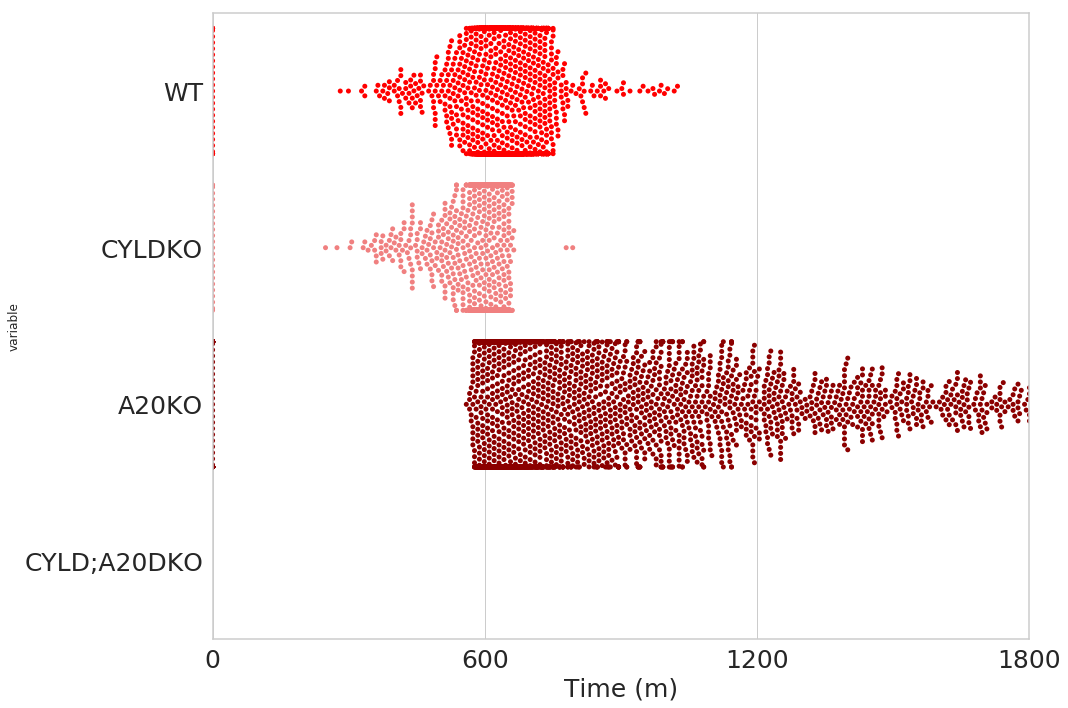

In [168]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "CYLDKO": "lightcoral", "A20KO":"darkred", 'CYLD;A20DKO': 'rosybrown'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 1)
ax.set_xticks([0, 600, 1200, 1800])
plt.tight_layout()
plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

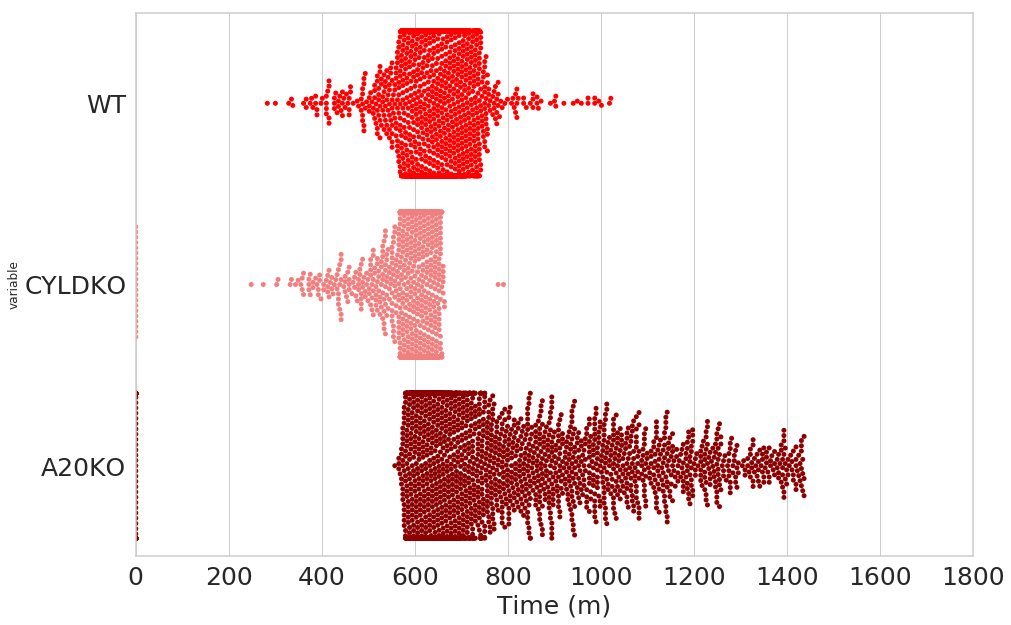

In [141]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "CYLDKO": "lightcoral", "A20KO":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

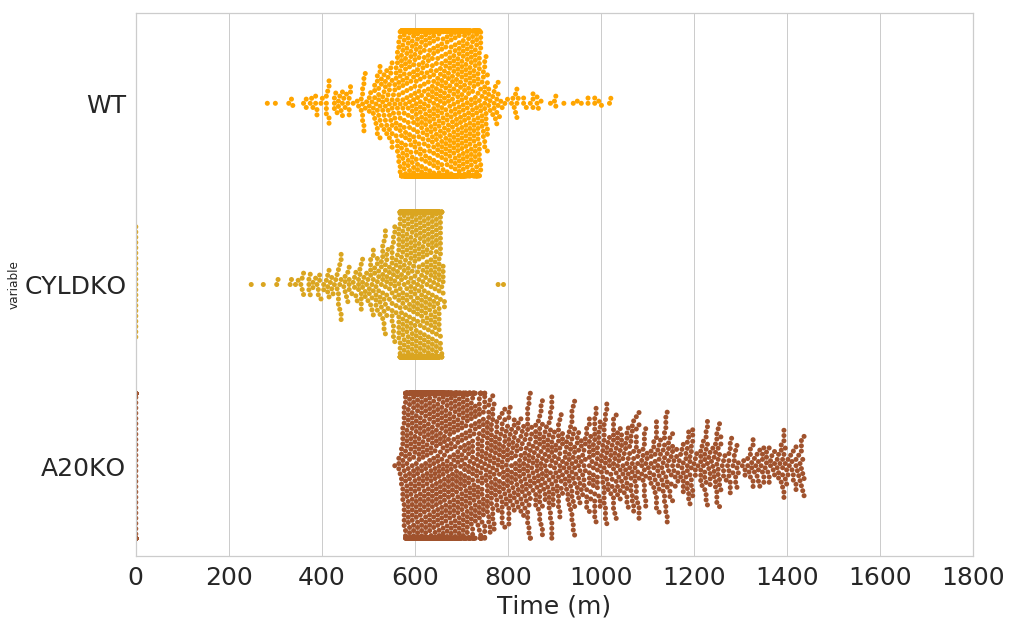

In [129]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "orange", "CYLDKO": "goldenrod", "A20KO":"sienna"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()